# START

## Load the Modules 

In [1]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import pandas as pd
import sys
import datetime
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
# AA1 Read the data 
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), ":  Reading in files")
train_id = pd.read_csv('train_identity.csv')
train_tr = pd.read_csv('train_transaction.csv')
test_id = pd.read_csv('test_identity.csv')
test_tr = pd.read_csv('test_transaction.csv')

2019-09-18 21:18:43 :  Reading in files


In [3]:
# AA1:   MErge the data 
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), ":  Merge Data")
train = pd.merge(train_tr, train_id, on='TransactionID', how='left')
test = pd.merge(test_tr, test_id, on='TransactionID', how='left')

2019-09-18 21:19:14 :  Merge Data


### Quick and Dirty way to set the Columns am interested in 

In [6]:
# Set what columns / Features to use 'Amount' and 'V1', ..., 'V28' features
# features = ['Amount'] + ['V%d' % number for number in range(1, 29)]
# From identity
features = ['id_01'] + ['id_02'] + ['id_03'] + ['id_04'] + ['id_05'] + ['id_06'] + ['id_07'] + ['id_08'] + ['id_09'] + ['id_10'] + ['id_11'] + ['id_12'] + ['id_13'] + ['id_14'] + ['id_15'] + ['id_16'] + ['id_17'] + ['id_18'] + ['id_19'] + ['id_20'] + ['id_21'] + ['id_22'] + ['id_23'] + ['id_24'] + ['id_25'] + ['id_26'] + ['id_27'] + ['id_28'] + ['id_29'] + ['id_30'] + ['id_31'] + ['id_32'] + ['id_33'] + ['id_34'] + ['id_35'] + ['id_36'] + ['id_37'] + ['id_38'] + ['DeviceType'] + ['DeviceInfo'] 
#Fron transactions 
features += ['TransactionAmt'] + ['ProductCD'] + ['card1'] + ['card2'] + ['card3'] + ['card4'] + ['card5'] + ['card6'] + ['addr1'] + ['addr2'] + ['dist1'] + ['dist2'] + ['P_emaildomain'] + ['R_emaildomain'] + ['C1'] + ['C2'] + ['C3'] + ['C4'] + ['C5'] + ['C6'] + ['C7'] + ['C8'] + ['C9'] + ['C10'] + ['C11'] + ['C12'] + ['C13'] + ['C14'] + ['D1'] + ['D2'] + ['D3'] + ['D4'] + ['D5'] + ['D6'] + ['D7'] + ['D8'] + ['D9'] + ['D10'] + ['D11'] + ['D12'] + ['D13'] + ['D14'] + ['D15'] + ['M1'] + ['M2'] + ['M3'] + ['M4'] + ['M5'] + ['M6'] + ['M7'] + ['M8'] + ['M9'] + ['V1'] + ['V2'] + ['V3'] + ['V4'] + ['V5'] + ['V6'] + ['V7'] + ['V8'] + ['V9'] + ['V10'] + ['V11'] + ['V12'] + ['V13'] + ['V14'] + ['V15'] + ['V16'] + ['V17'] + ['V18'] + ['V19'] + ['V20'] + ['V21'] + ['V22'] + ['V23'] + ['V24'] + ['V25'] + ['V26'] + ['V27'] + ['V28'] + ['V29'] + ['V30'] + ['V31'] + ['V32'] + ['V33'] + ['V34'] + ['V35'] + ['V36'] + ['V37'] + ['V38'] + ['V39'] + ['V40'] + ['V41'] + ['V42'] + ['V43'] + ['V44'] + ['V45'] + ['V46'] + ['V47'] + ['V48'] + ['V49'] + ['V50'] + ['V51'] + ['V52'] + ['V53'] + ['V54'] + ['V55'] + ['V56'] + ['V57'] + ['V58'] + ['V59'] + ['V60'] + ['V61'] + ['V62'] + ['V63'] + ['V64'] + ['V65'] + ['V66'] + ['V67'] + ['V68'] + ['V69'] + ['V70'] + ['V71'] + ['V72'] + ['V73'] + ['V74'] + ['V75'] + ['V76'] + ['V77'] + ['V78'] + ['V79'] + ['V80'] + ['V81'] + ['V82'] + ['V83'] + ['V84'] + ['V85'] + ['V86'] + ['V87'] + ['V88'] + ['V89'] + ['V90'] + ['V91'] + ['V92'] + ['V93'] + ['V94'] + ['V95'] + ['V96'] + ['V97'] + ['V98'] + ['V99'] + ['V100'] + ['V101'] + ['V102'] + ['V103'] + ['V104'] + ['V105'] + ['V106'] + ['V107'] + ['V108'] + ['V109'] + ['V110'] + ['V111'] + ['V112'] + ['V113'] + ['V114'] + ['V115'] + ['V116'] + ['V117'] + ['V118'] + ['V119'] + ['V120'] + ['V121'] + ['V122'] + ['V123'] + ['V124'] + ['V125'] + ['V126'] + ['V127'] + ['V128'] + ['V129'] + ['V130'] + ['V131'] + ['V132'] + ['V133'] + ['V134'] + ['V135'] + ['V136'] + ['V137'] + ['V138'] + ['V139'] + ['V140'] + ['V141'] + ['V142'] + ['V143'] + ['V144'] + ['V145'] + ['V146'] + ['V147'] + ['V148'] + ['V149'] + ['V150'] + ['V151'] + ['V152'] + ['V153'] + ['V154'] + ['V155'] + ['V156'] + ['V157'] + ['V158'] + ['V159'] + ['V160'] + ['V161'] + ['V162'] + ['V163'] + ['V164'] + ['V165'] + ['V166'] + ['V167'] + ['V168'] + ['V169'] + ['V170'] + ['V171'] + ['V172'] + ['V173'] + ['V174'] + ['V175'] + ['V176'] + ['V177'] + ['V178'] + ['V179'] + ['V180'] + ['V181'] + ['V182'] + ['V183'] + ['V184'] + ['V185'] + ['V186'] + ['V187'] + ['V188'] + ['V189'] + ['V190'] + ['V191'] + ['V192'] + ['V193'] + ['V194'] + ['V195'] + ['V196'] + ['V197'] + ['V198'] + ['V199'] + ['V200'] + ['V201'] + ['V202'] + ['V203'] + ['V204'] + ['V205'] + ['V206'] + ['V207'] + ['V208'] + ['V209'] + ['V210'] + ['V211'] + ['V212'] + ['V213'] + ['V214'] + ['V215'] + ['V216'] + ['V217'] + ['V218'] + ['V219'] + ['V220'] + ['V221'] + ['V222'] + ['V223'] + ['V224'] + ['V225'] + ['V226'] + ['V227'] + ['V228'] + ['V229'] + ['V230'] + ['V231'] + ['V232'] + ['V233'] + ['V234'] + ['V235'] + ['V236'] + ['V237'] + ['V238'] + ['V239'] + ['V240'] + ['V241'] + ['V242'] + ['V243'] + ['V244'] + ['V245'] + ['V246'] + ['V247'] + ['V248'] + ['V249'] + ['V250'] + ['V251'] + ['V252'] + ['V253'] + ['V254'] + ['V255'] + ['V256'] + ['V257'] + ['V258'] + ['V259'] + ['V260'] + ['V261'] + ['V262'] + ['V263'] + ['V264'] + ['V265'] + ['V266'] + ['V267'] + ['V268'] + ['V269'] + ['V270'] + ['V271'] + ['V272'] + ['V273'] + ['V274'] + ['V275'] + ['V276'] + ['V277'] + ['V278'] + ['V279'] + ['V280'] + ['V281'] + ['V282'] + ['V283'] + ['V284'] + ['V285'] + ['V286'] + ['V287'] + ['V288'] + ['V289'] + ['V290'] + ['V291'] + ['V292'] + ['V293'] + ['V294'] + ['V295'] + ['V296'] + ['V297'] + ['V298'] + ['V299'] + ['V300'] + ['V301'] + ['V302'] + ['V303'] + ['V304'] + ['V305'] + ['V306'] + ['V307'] + ['V308'] + ['V309'] + ['V310'] + ['V311'] + ['V312'] + ['V313'] + ['V314'] + ['V315'] + ['V316'] + ['V317'] + ['V318'] + ['V319'] + ['V320'] + ['V321'] + ['V322'] + ['V323'] + ['V324'] + ['V325'] + ['V326'] + ['V327'] + ['V328'] + ['V329'] + ['V330'] + ['V331'] + ['V332'] + ['V333'] + ['V334'] + ['V335'] + ['V336'] + ['V337'] + ['V338'] + ['V339']
print(features)

['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35',

### Set the Target column 

In [5]:
target = 'isFraud'

### Create the main X and y Dataframes

In [7]:
# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = train[features]
y = train[target]

## Show visualisation of some data

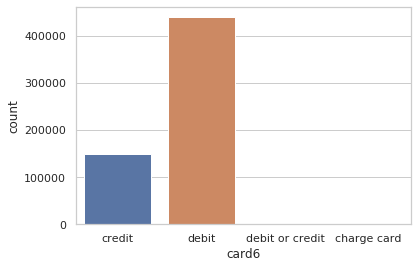

In [8]:
# Show counts of creditcard vs debit card 
sns.set(style="whitegrid")
sns.countplot(x="card6", data=train);
plt.show()


### Create the normalization function 

In [9]:

def normalize(X):
    """
    Make the distribution of the values of each variable similar by subtracting the mean and by dividing by the standard deviation.
    """
    for feature in X.columns:
        X[feature] -= X[feature].mean()
        X[feature] /= X[feature].std()
    return X


## Massage the X Dataframe to allow it to be used

### Replace all the Empty cells (NaNs) with 0

In [10]:
X2 = X.fillna(0)

### Remove all the String based columns   -- Quick and Dirty method 

In [11]:
X3 = X2.drop(X2.select_dtypes(include=['object']).columns, axis=1)

### Now Normalize all the data in it 

In [12]:
X4 = normalize(X3)

# Now Run the Machine Learning part

### Define the Model

In [13]:
# Define the model
model = LogisticRegression()

### Configure the Splitter function 

In [14]:
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), ":  Configure Split")
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)

2019-09-18 21:30:09 :  Configure Split


### Now as part of the SPLIT   ( only 1 run ),  Split the data int train and test and do a ML Fit and comparison on it   

In [15]:
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), ":  Start Split")
# Loop through the splits (only one defined in n_split = 1 above)
for train_indices, test_indices in splitter.split(X4, y):
    
    # Select the train and test data
    print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), ":  Split the train for X,y")
    X_train, y_train = X4.iloc[train_indices], y.iloc[train_indices]
    print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), ":  Split the test for X,y")
    X_test, y_test = X4.iloc[test_indices], y.iloc[test_indices]
    
    # Normalize the data
    # X_train = normalize(X_train)
    # X_test = normalize(X_test)
    
    # Fit and predict!
    print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), ":  Fit the Model")
    model.fit(X_train, y_train)
    print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), ":  run the prediction")
    y_pred = model.predict(X_test)
    
    # And finally: show the results
    print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), ":  classification_report")
    print(classification_report(y_test, y_pred))

2019-09-18 21:31:44 :  Start Split
2019-09-18 21:31:44 :  Split the train for X,y
2019-09-18 21:31:52 :  Split the test for X,y
2019-09-18 21:31:54 :  Fit the Model


/home/aalam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


2019-09-18 21:37:24 :  run the prediction
2019-09-18 21:37:25 :  classification_report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    284939
           1       0.80      0.25      0.38     10331

    accuracy                           0.97    295270
   macro avg       0.89      0.62      0.68    295270
weighted avg       0.97      0.97      0.96    295270

